In [1]:
import yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import nltk
import textblob


## Preprocessing Data

In [3]:
df = pd.read_csv('tesla_stock_and_news.csv')

In [4]:
df.head()

,Date,Open,Close,Headline
0,2021-01-04,239.820007,243.256668,No specific news available
1,2021-01-05,241.220001,245.036667,No specific news available
2,2021-01-06,252.830002,251.993332,No specific news available
3,2021-01-07,259.209991,272.013336,No specific news available
4,2021-01-08,285.333344,293.339996,No specific news available


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      269 non-null    object 
 1   Open      269 non-null    float64
 2   Close     269 non-null    float64
 3   Headline  269 non-null    object 
dtypes: float64(2), object(2)
memory usage: 8.5+ KB


In [6]:
df['Date'] = df['Date'].apply(pd.to_datetime, errors = 'coerce')

In [7]:
columns = ['Date', 'Open', 'Headline']
q_80 = int(round(len(df['Date']) * 0.8))
X_train, Y_train = df[columns][q_80:], df['Close'][q_80:]
X_test, Y_test = df[columns][:q_80], df['Close'][:q_80]

In [8]:
for index, row in df.iterrows():
    df.at[index, "Sentiment_data"] = row["Headline"] if row["Headline"] != "No specific news available" else ""

In [9]:
df.head(10)

,Date,Open,Close,Headline,Sentiment_data
0,2021-01-04,239.820007,243.256668,No specific news available,
1,2021-01-05,241.220001,245.036667,No specific news available,
2,2021-01-06,252.830002,251.993332,No specific news available,
3,2021-01-07,259.209991,272.013336,No specific news available,
4,2021-01-08,285.333344,293.339996,No specific news available,
5,2021-01-11,283.133331,270.396667,No specific news available,
6,2021-01-12,277.000000,283.146667,No specific news available,
7,2021-01-13,284.253326,284.803345,"Elon Musk Loves China, and China Loves Him Bac...","Elon Musk Loves China, and China Loves Him Bac..."
8,2021-01-14,281.130005,281.666656,No specific news available,
9,2021-01-15,284.000000,275.386658,No specific news available,


## Sentiment Analysis

In [10]:
import pandas as pd
from textblob import TextBlob
from nltk.tokenize.toktok import ToktokTokenizer
import re
tokenizer = ToktokTokenizer()
import spacy
nlp = spacy.load('en_core_web_sm', disable = ['ner'])

In [11]:
import numpy as np
train = df['Sentiment_data']
train.replace(r'^\s*$', np.nan, regex = True, inplace = True)
train.dropna(axis = 0, how = 'any', inplace = True)

In [12]:
train = train.str.encode('ascii', 'ignore').str.decode('ascii')
print("Non ASCII data removed")

Non ASCII data removed


In [13]:
def remove_punctuation(review):
    import string
    for punctuation in string.punctuation:
        review = review.replace(punctuation, '')
    return review
train = train.apply(remove_punctuation)

In [14]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rishi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
stopwords_list = nltk.corpus.stopwords.words('english')
stopwords_list.remove('no')
stopwords_list.remove('not')

In [16]:
def custom_remove_stopwords(text, is_lower_case = False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords_list]
    filtered_text = ''.join(filtered_tokens)
    return filtered_text

In [17]:
#train = train.apply(custom_remove_stopwords)

In [18]:
def remove_special_characters(text):
    text = re.sub('[^a-zA-z0-9\s]', '', text)
    return text

In [19]:
train = train.apply(remove_special_characters)

In [20]:
train

7      Elon Musk Loves China and China Loves Him Back...
10     Rs 25 Lakh Tesla Model 3 Introduced Coming To ...
13     Tesla sues former employee for allegedly steal...
15     Heres how much a Tesla car will cost you in In...
16     How Teslas Charging Stations Left Other Manufa...
                             ...                        
256    Market Highlights Sensex crashes 503 points Ni...
257    Six Tesla workers file additional lawsuits all...
261    As young Indians jump into soaring stock marke...
264    US stock market investors wonder how much gas ...
265    Sensex ends 290 pts higher Nifty above 17000 p...
Name: Sentiment_data, Length: 135, dtype: object

In [21]:
def remove_html(text):
    import re
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r' ', text)

In [22]:
train = train.apply(remove_html)

In [23]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r' ', text)

In [24]:
train = train.apply(remove_URL)

In [25]:
def remove_numbers(text):
    text = ''.join([i for i in text if not i.isdigit()])
    return text

In [26]:
#train = train.apply(remove_numbers)

In [27]:
def cleanse(word):
    rx = re.compile(r'\D*\d')
    if rx.match(word):
        return ' '
    return word

def remove_alphanumeric(strings):
    nstrings = [" ".join(filter(None, (
                cleanse(word) for word in string.split())))
               for string in strings.split()]
    str1 = ' '.join(nstrings)
    return str1

In [28]:
train = train.apply(remove_alphanumeric)

In [29]:
train

7      Elon Musk Loves China and China Loves Him Back...
10     Rs   Lakh Tesla Model   Introduced Coming To I...
13     Tesla sues former employee for allegedly steal...
15     Heres how much a Tesla car will cost you in In...
16     How Teslas Charging Stations Left Other Manufa...
                             ...                        
256    Market Highlights Sensex crashes   points Nift...
257    Six Tesla workers file additional lawsuits all...
261    As young Indians jump into soaring stock marke...
264    US stock market investors wonder how much gas ...
265    Sensex ends   pts higher Nifty above   pharma ...
Name: Sentiment_data, Length: 135, dtype: object

In [30]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != "-PRON-" else word.text for word in text])
    return text

In [31]:
train = train.apply(lemmatize_text)

In [32]:
train

7      Elon Musk love China and China love he Backfor...
10     r    Lakh Tesla Model    introduce come to Ind...
13     Tesla sue former employee for allegedly steal ...
15     here how much a Tesla car will cost you in Ind...
16     how Teslas Charging Stations leave other Manuf...
                             ...                        
256    market Highlights Sensex crash    point Nifty ...
257    six tesla worker file additional lawsuit alleg...
261    as young Indians jump into soar stock market r...
264    US stock market investor wonder how much gas b...
265    sensex end    pt high Nifty above    pharma fi...
Name: Sentiment_data, Length: 135, dtype: object

In [33]:
df['Sentiment_data'] = train

In [34]:
df["Sentiment_data"] = df["Sentiment_data"].astype(str)

In [35]:
df['Sentiment'] = df['Sentiment_data'].apply(lambda x: TextBlob(str(x)).sentiment if isinstance(x, str) else (None, None))


In [36]:
df.head(20)

,Date,Open,Close,Headline,Sentiment_data,Sentiment
0,2021-01-04,239.820007,243.256668,No specific news available,nan,"(0.0, 0.0)"
1,2021-01-05,241.220001,245.036667,No specific news available,nan,"(0.0, 0.0)"
2,2021-01-06,252.830002,251.993332,No specific news available,nan,"(0.0, 0.0)"
3,2021-01-07,259.209991,272.013336,No specific news available,nan,"(0.0, 0.0)"
4,2021-01-08,285.333344,293.339996,No specific news available,nan,"(0.0, 0.0)"
5,2021-01-11,283.133331,270.396667,No specific news available,nan,"(0.0, 0.0)"
6,2021-01-12,277.000000,283.146667,No specific news available,nan,"(0.0, 0.0)"
7,2021-01-13,284.253326,284.803345,"Elon Musk Loves China, and China Loves Him Bac...",Elon Musk love China and China love he Backfor...,"(0.5, 0.6)"
8,2021-01-14,281.130005,281.666656,No specific news available,nan,"(0.0, 0.0)"
9,2021-01-15,284.000000,275.386658,No specific news available,nan,"(0.0, 0.0)"


In [37]:
sentiment_series = df['Sentiment'].tolist()

In [38]:
columns = ['polarity', 'subjectivity']
df1 = pd.DataFrame(sentiment_series, columns = columns, index = df.index)

In [39]:
df1.head(20)

,polarity,subjectivity
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
5,0.000000,0.000000
6,0.000000,0.000000
7,0.500000,0.600000
8,0.000000,0.000000
9,0.000000,0.000000


In [40]:
df = pd.concat([df, df1], axis = 1)

In [41]:
df.head(20)

,Date,Open,Close,Headline,Sentiment_data,Sentiment,polarity,subjectivity
0,2021-01-04,239.820007,243.256668,No specific news available,nan,"(0.0, 0.0)",0.000000,0.000000
1,2021-01-05,241.220001,245.036667,No specific news available,nan,"(0.0, 0.0)",0.000000,0.000000
2,2021-01-06,252.830002,251.993332,No specific news available,nan,"(0.0, 0.0)",0.000000,0.000000
3,2021-01-07,259.209991,272.013336,No specific news available,nan,"(0.0, 0.0)",0.000000,0.000000
4,2021-01-08,285.333344,293.339996,No specific news available,nan,"(0.0, 0.0)",0.000000,0.000000
5,2021-01-11,283.133331,270.396667,No specific news available,nan,"(0.0, 0.0)",0.000000,0.000000
6,2021-01-12,277.000000,283.146667,No specific news available,nan,"(0.0, 0.0)",0.000000,0.000000
7,2021-01-13,284.253326,284.803345,"Elon Musk Loves China, and China Loves Him Bac...",Elon Musk love China and China love he Backfor...,"(0.5, 0.6)",0.500000,0.600000
8,2021-01-14,281.130005,281.666656,No specific news available,nan,"(0.0, 0.0)",0.000000,0.000000
9,2021-01-15,284.000000,275.386658,No specific news available,nan,"(0.0, 0.0)",0.000000,0.000000


In [42]:
df["polarity"] = df["polarity"].astype(float)
df["subjectivity"] = df["subjectivity"].astype(float)

## Time Series Forecasting using LSTM

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            269 non-null    datetime64[ns]
 1   Open            269 non-null    float64       
 2   Close           269 non-null    float64       
 3   Headline        269 non-null    object        
 4   Sentiment_data  269 non-null    object        
 5   Sentiment       269 non-null    object        
 6   polarity        269 non-null    float64       
 7   subjectivity    269 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 16.9+ KB


In [44]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year = year, month = month, day = day)

In [45]:
df = df[["Date", "Close", "polarity"]]
df.head(20)

,Date,Close,polarity
0,2021-01-04,243.256668,0.000000
1,2021-01-05,245.036667,0.000000
2,2021-01-06,251.993332,0.000000
3,2021-01-07,272.013336,0.000000
4,2021-01-08,293.339996,0.000000
5,2021-01-11,270.396667,0.000000
6,2021-01-12,283.146667,0.000000
7,2021-01-13,284.803345,0.500000
8,2021-01-14,281.666656,0.000000
9,2021-01-15,275.386658,0.000000


In [46]:
df.index = df.pop('Date')
df

,Close,polarity
Date,,
2021-01-04,243.256668,0.000000
2021-01-05,245.036667,0.000000
2021-01-06,251.993332,0.000000
2021-01-07,272.013336,0.000000
2021-01-08,293.339996,0.000000
...,...,...
2021-12-23,355.666656,0.200000
2021-12-27,364.646667,0.053333
2021-12-28,362.823334,0.000000


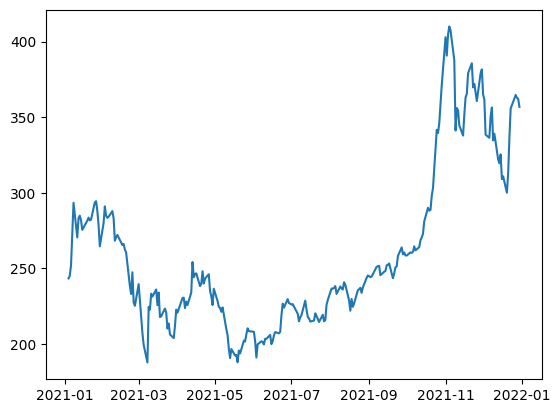

In [47]:
plt.plot(df.index, df['Close'])

In [48]:
import datetime
import pandas as pd
import numpy as np

def df_to_windowed_df(dataframe, first_date, last_date, n=3):
    # Ensure the index is a datetime index for slicing
    dataframe = dataframe.copy()
    dataframe.index = pd.to_datetime(dataframe.index)

    # Convert string dates to datetime objects
    first_date = pd.to_datetime(first_date)
    last_date = pd.to_datetime(last_date)

    target_date = first_date

    dates = []
    X, Y = [], []

    while target_date <= last_date:
        # Get the rolling window of size n+1
        df_subset = dataframe.loc[:target_date].tail(n + 1)

        if len(df_subset) != n + 1:
            # Skip if window is too small
            target_date += datetime.timedelta(days=1)
            continue

        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]  # Inputs and target

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        # Move to the next available date in the data
        next_dates = dataframe.loc[target_date + datetime.timedelta(days=1):].index
        if len(next_dates) == 0:
            break  # No more data
        target_date = next_dates[0]

    # Create DataFrame
    ret_df = pd.DataFrame({'Target Date': dates})
    X = np.array(X)
    for i in range(n):
        ret_df[f'Target-{n - i}'] = X[:, i]
    ret_df['Target'] = Y

    return ret_df

# Example usage
windowed_df = df_to_windowed_df(df, '2021-01-07', '2021-12-28', n=3)
windowed_df


,Target Date,Target-3,Target-2,Target-1,Target
0,2021-01-07,243.256668,245.036667,251.993332,272.013336
1,2021-01-08,245.036667,251.993332,272.013336,293.339996
2,2021-01-11,251.993332,272.013336,293.339996,270.396667
3,2021-01-12,272.013336,293.339996,270.396667,283.146667
4,2021-01-13,293.339996,270.396667,283.146667,284.803345
...,...,...,...,...,...
241,2021-12-21,308.973328,310.856659,299.980011,312.843323
242,2021-12-22,310.856659,299.980011,312.843323,336.290009
243,2021-12-23,299.980011,312.843323,336.290009,355.666656
244,2021-12-27,312.843323,336.290009,355.666656,364.646667


In [49]:
def windowed_df_to_date_X_Y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_Y(windowed_df)

dates.shape, X.shape, y.shape

((246,), (246, 3, 1), (246,))

In [58]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Assume df contains 'Close' and other features
scaler = MinMaxScaler()
df['Close_scaled'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Sequence Preparation
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 50
X, y = create_sequences(df['Close_scaled'].values, df['Close_scaled'].values, seq_length)

# Train-Test-Validation Split
train_size = int(0.8 * len(X))
val_size = int(0.1 * len(X))

X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

# Model Definition
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.3),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')

# Training
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=16,
    verbose=2
)

# Predictions (Denormalize for Evaluation)
predictions_train = scaler.inverse_transform(model.predict(X_train))
predictions_val = scaler.inverse_transform(model.predict(X_val))
predictions_test = scaler.inverse_transform(model.predict(X_test))


C:\Users\rishi\Python\Python3119\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
11/11 - 9s - 832ms/step - loss: 0.0544 - val_loss: 0.3174
Epoch 2/100
11/11 - 1s - 88ms/step - loss: 0.0302 - val_loss: 0.1311
Epoch 3/100
11/11 - 1s - 70ms/step - loss: 0.0165 - val_loss: 0.0424
Epoch 4/100
11/11 - 1s - 61ms/step - loss: 0.0165 - val_loss: 0.0387
Epoch 5/100
11/11 - 1s - 60ms/step - loss: 0.0139 - val_loss: 0.0444
Epoch 6/100
11/11 - 1s - 90ms/step - loss: 0.0123 - val_loss: 0.0359
Epoch 7/100
11/11 - 1s - 63ms/step - loss: 0.0134 - val_loss: 0.0277
Epoch 8/100
11/11 - 1s - 80ms/step - loss: 0.0133 - val_loss: 0.0290
Epoch 9/100
11/11 - 1s - 116ms/step - loss: 0.0112 - val_loss: 0.0355
Epoch 10/100
11/11 - 1s - 108ms/step - loss: 0.0104 - val_loss: 0.0442
Epoch 11/100
11/11 - 2s - 157ms/step - loss: 0.0098 - val_loss: 0.0632
Epoch 12/100
11/11 - 1s - 131ms/step - loss: 0.0087 - val_loss: 0.0902
Epoch 13/100
11/11 - 2s - 207ms/step - loss: 0.0101 - val_loss: 0.1100
Epoch 14/100
11/11 - 1s - 132ms/step - loss: 0.0091 - val_loss: 0.1344
Epoch 15/100
11/11 - 1

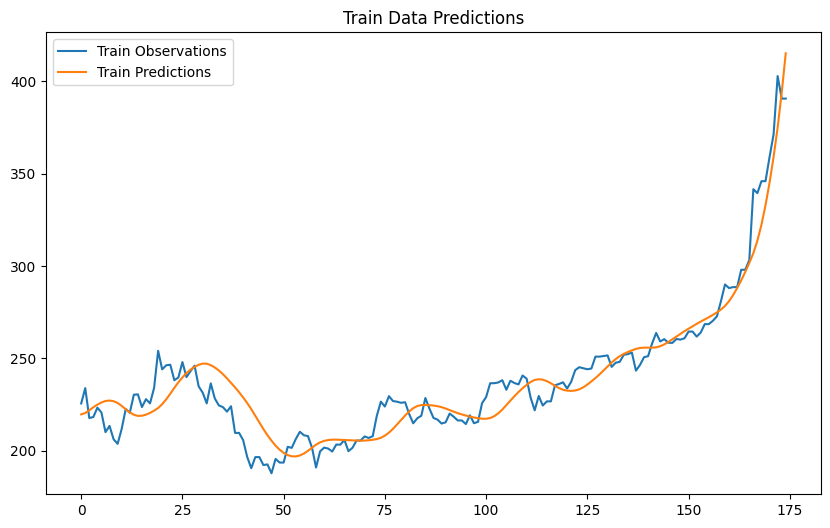

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), scaler.inverse_transform(y_train.reshape(-1, 1)), label="Train Observations")
plt.plot(range(len(predictions_train)), predictions_train, label="Train Predictions")
plt.legend()
plt.title("Train Data Predictions")
plt.show()


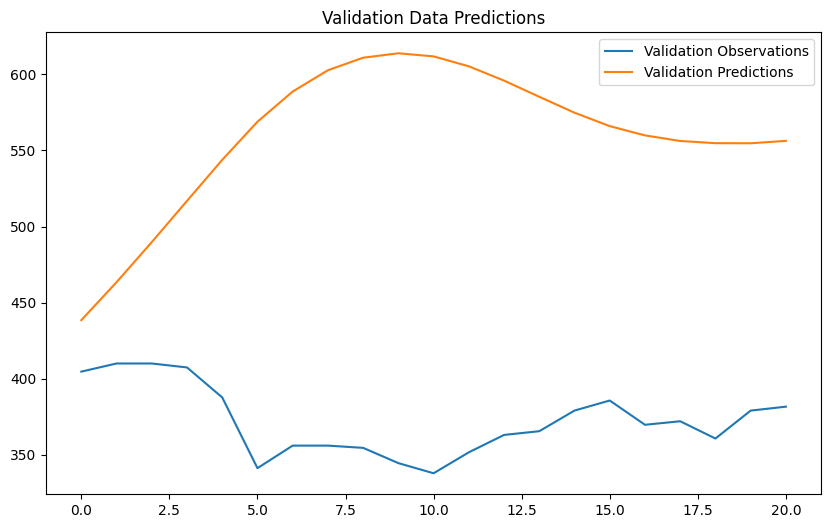

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_val)), scaler.inverse_transform(y_val.reshape(-1, 1)), label="Validation Observations")
plt.plot(range(len(predictions_val)), predictions_val, label="Validation Predictions")
plt.legend()
plt.title("Validation Data Predictions")
plt.show()


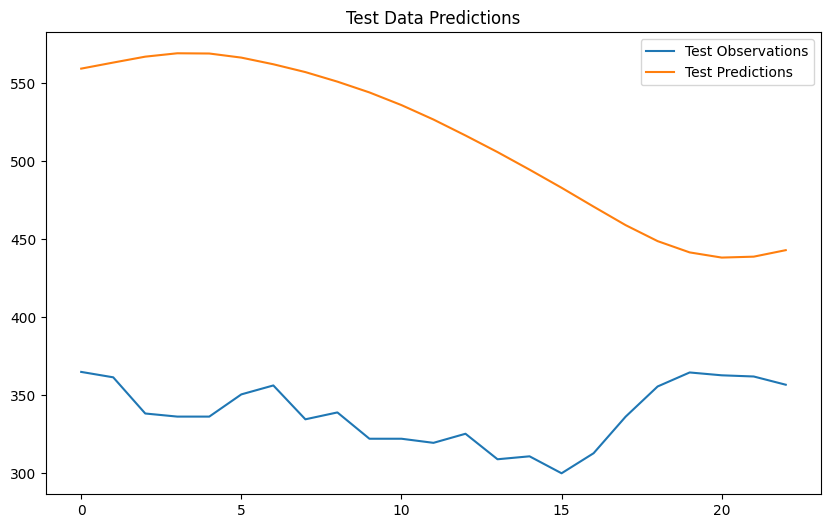

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), scaler.inverse_transform(y_test.reshape(-1, 1)), label="Test Observations")
plt.plot(range(len(predictions_test)), predictions_test, label="Test Predictions")
plt.legend()
plt.title("Test Data Predictions")
plt.show()
